In [17]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("./student/student-por.csv", sep=";")  # Adjust delimiter if necessary

# Select features and target variable
X = data.drop(columns=["G3"])  # 'G3' is the final grade (target variable)
y = data["G3"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Save the column order for future use
joblib.dump(X.columns, "training_columns.pkl")  # Save the column names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")  # Save the scaler object
joblib.dump(X.columns.tolist(), "columns.pkl")


['columns.pkl']

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
17/17 [==============================] - 0s 12ms/step - loss: 124.0020 - mae: 10.7021 - val_loss: 104.1510 - val_mae: 9.8623
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 79.8452 - mae: 8.5130 - val_loss: 53.7085 - val_mae: 6.9320
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 38.1518 - mae: 5.6520 - val_loss: 17.4737 - val_mae: 3.6656
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 13.1233 - mae: 2.9644 - val_loss: 8.7383 - val_mae: 2.2610
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 7.4642 - mae: 2.0454 - val_loss: 6.8473 - val_mae: 2.0049
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 5.5355 - mae: 1.7125 - val_loss: 4.8745 - val_mae: 1.6918
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 4.4204 - mae: 1.5475 - val_loss: 4.2723 - val_mae: 1.5494
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 3.9012 

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))


RMSE: 1.6478424121816428
MAE: 0.9153846153846154


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


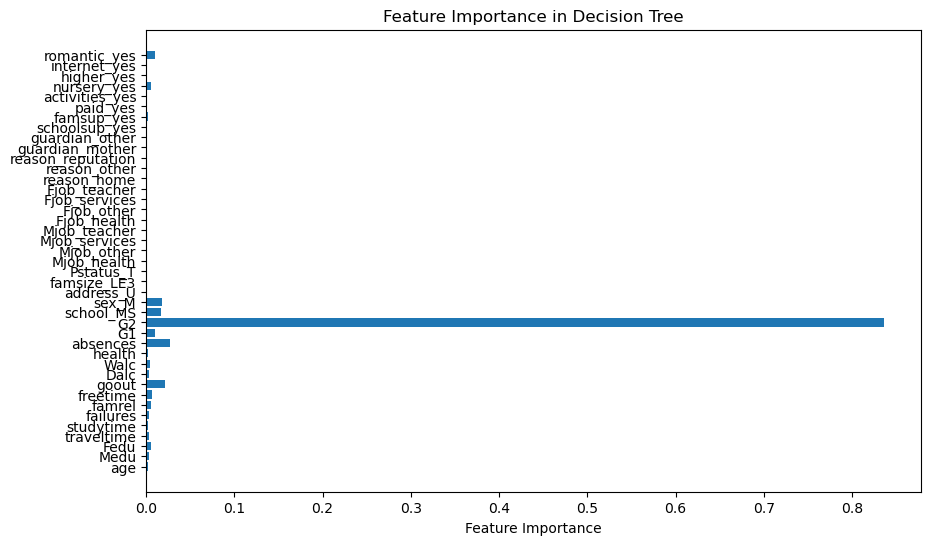

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importances = dt_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), X.columns)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()


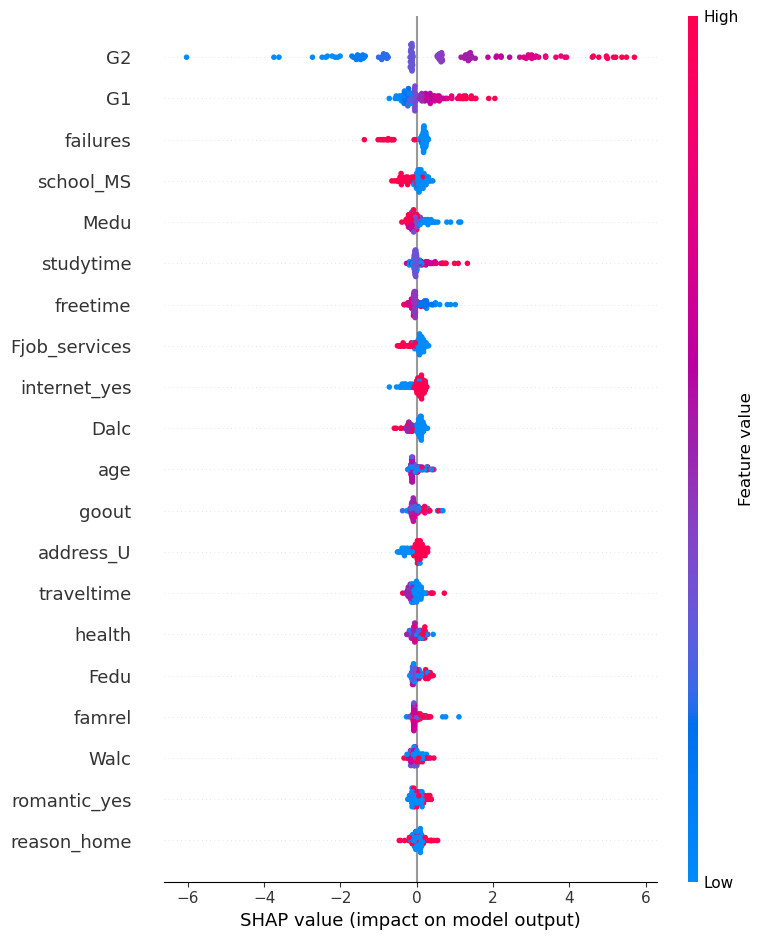

In [21]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [22]:
from tensorflow.keras.optimizers import Adam

# Experiment with different learning rates
learning_rates = [0.001, 0.0005, 0.01]
for lr in learning_rates:
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error', metrics=['mae'])
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
17/17 [==============================] - 0s 12ms/step - loss: 0.5986 - mae: 0.5767 - val_loss: 2.5750 - val_mae: 1.2482
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5049 - mae: 0.5283 - val_loss: 2.5949 - val_mae: 1.2559
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.4571 - mae: 0.5064 - val_loss: 2.6800 - val_mae: 1.2676
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.4151 - mae: 0.4705 - val_loss: 2.6033 - val_mae: 1.2707
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3740 - mae: 0.4478 - val_loss: 2.5896 - val_mae: 1.2554
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3467 - mae: 0.4356 - val_loss: 2.5802 - val_mae: 1.2644
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3183 - mae: 0.4158 - val_loss: 2.5782 - val_mae: 1.2722
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2972 - mae: 0.4

In [23]:
# Modify the architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
33/33 [==============================] - 1s 7ms/step - loss: 64.9774 - mae: 7.0624 - val_loss: 9.3808 - val_mae: 2.3677
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 7.8693 - mae: 2.0628 - val_loss: 4.1676 - val_mae: 1.5636
Epoch 3/50
33/33 [==============================] - 0s 2ms/step - loss: 3.9630 - mae: 1.4393 - val_loss: 2.8285 - val_mae: 1.2696
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 2.9584 - mae: 1.2033 - val_loss: 2.6246 - val_mae: 1.1781
Epoch 5/50
33/33 [==============================] - 0s 2ms/step - loss: 2.4736 - mae: 1.0969 - val_loss: 2.6179 - val_mae: 1.1934
Epoch 6/50
33/33 [==============================] - 0s 2ms/step - loss: 2.1426 - mae: 1.0307 - val_loss: 2.5396 - val_mae: 1.1617
Epoch 7/50
33/33 [==============================] - 0s 2ms/step - loss: 1.8294 - mae: 0.9578 - val_loss: 2.5109 - val_mae: 1.1369
Epoch 8/50
33/33 [==============================] - 0s 2ms/step - loss: 1.5620 - mae: 0.8

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and train the model
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train Decision Tree with optimal hyperparameters
optimized_dt_model = DecisionTreeRegressor(**best_params)
optimized_dt_model.fit(X_train, y_train)


Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)

In [25]:
# Predict and evaluate ANN
y_pred_ann = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_ann = mean_squared_error(y_test, y_pred_ann, squared=False)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("ANN Performance:")
print("RMSE:", rmse_ann)
print("MAE:", mae_ann)
print("R²:", r2_ann)


5/5 [==============================] - 0s 1ms/step
ANN Performance:
RMSE: 1.6410286780633814
MAE: 1.1718941578498254
R²: 0.7238460779190063


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
# Predict and evaluate Decision Tree
y_pred_dt = optimized_dt_model.predict(X_test)

rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("RMSE:", rmse_dt)
print("MAE:", mae_dt)
print("R²:", r2_dt)


Decision Tree Performance:
RMSE: 1.3886391985305684
MAE: 0.791194122266997
R²: 0.8022585124119805


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- decision tree is better since RSME and MAE is lower and R^2 is higher

In [27]:
import joblib

# Save the Decision Tree model
joblib.dump(optimized_dt_model, "decision_tree_model.pkl")

['decision_tree_model.pkl']

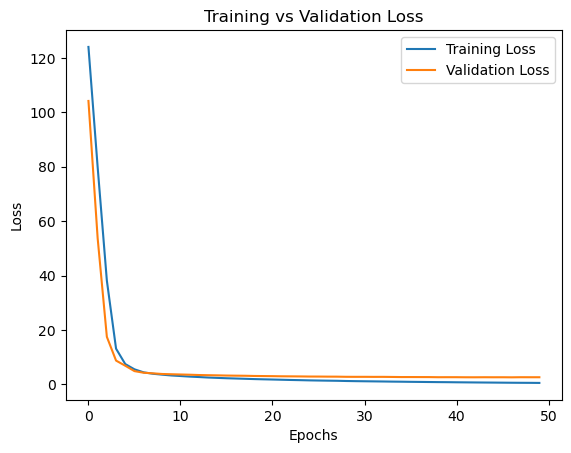

In [28]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
